#Data Exploration and Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('mobile_price.csv')

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2000, 21)


In [7]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scree

In [8]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 

In [9]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837 

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [12]:
print("\nTarget Distribution:")
print(df['price_range'].value_counts())


Target Distribution:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


#Exploratory Data Analysis (EDA)

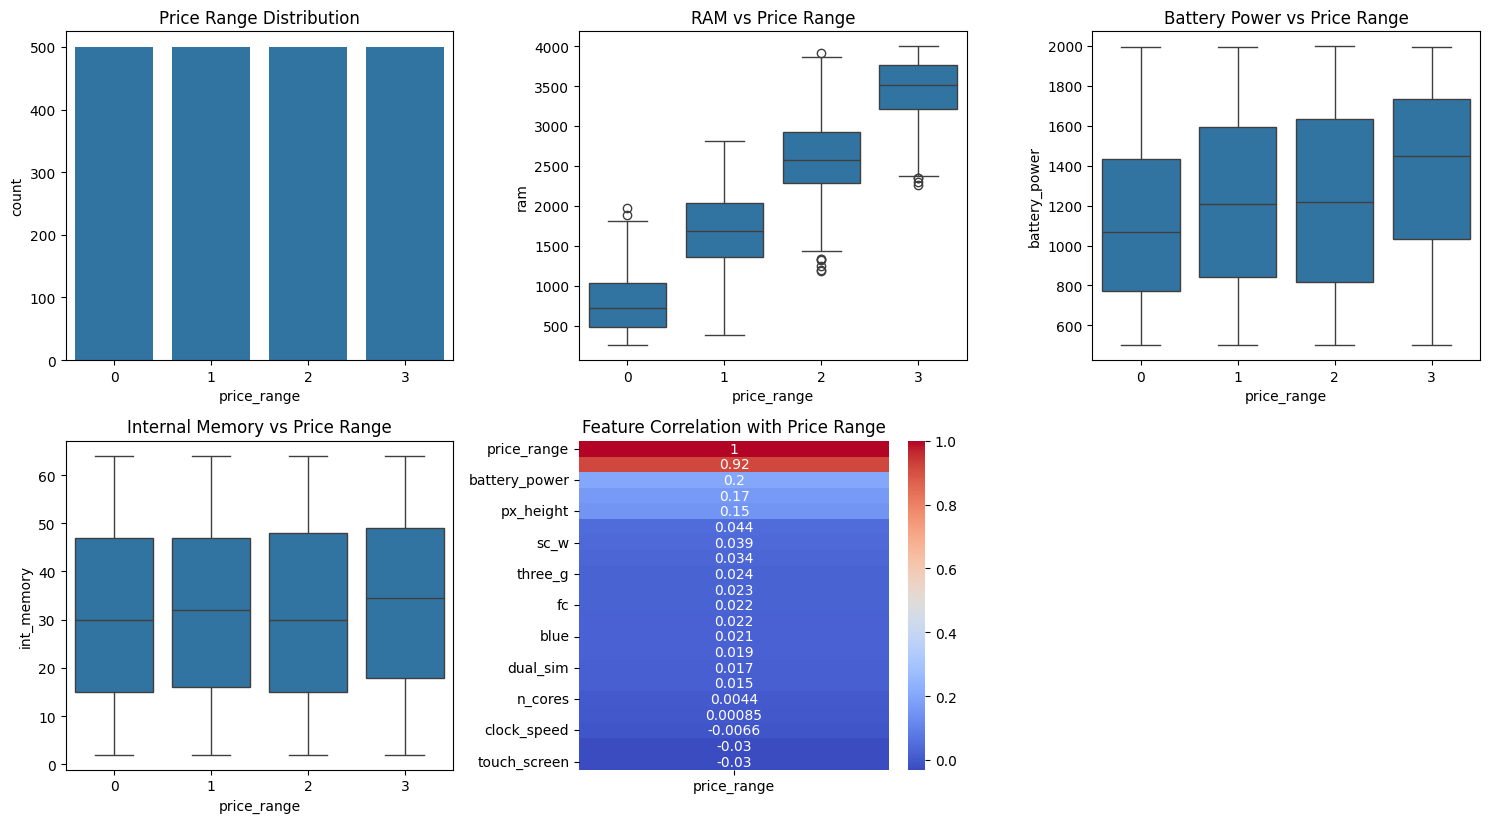

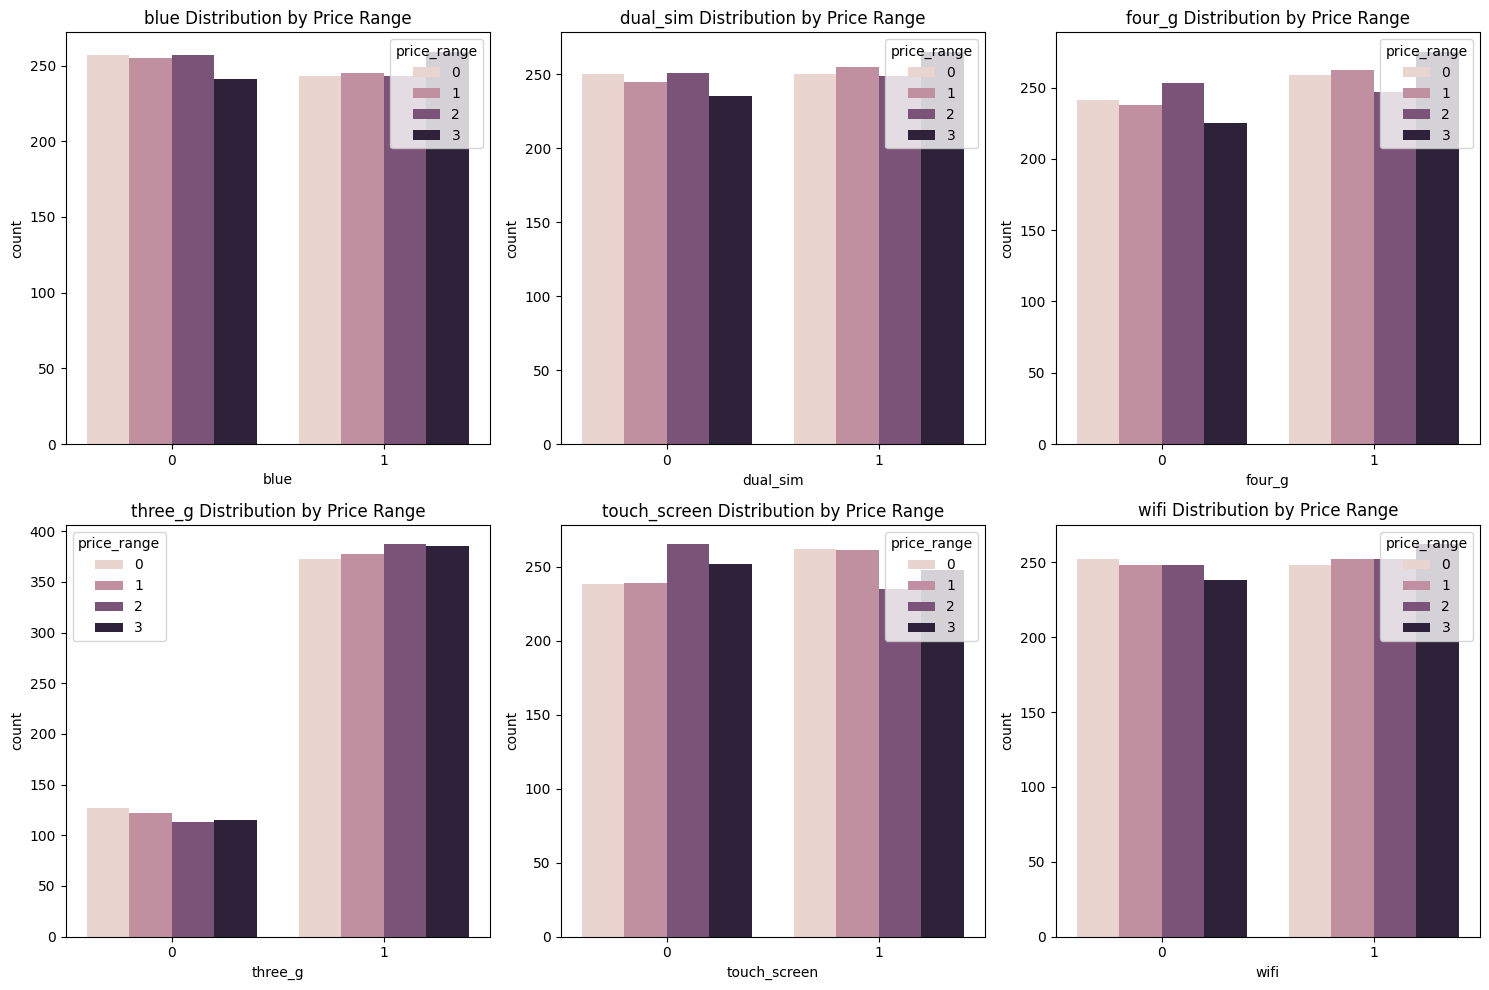

In [14]:
# Visualize the data
plt.figure(figsize=(15, 12))

# Target distribution
plt.subplot(3, 3, 1)
sns.countplot(x='price_range', data=df)
plt.title('Price Range Distribution')

# Correlation with RAM
plt.subplot(3, 3, 2)
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM vs Price Range')

# Correlation with battery power
plt.subplot(3, 3, 3)
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs Price Range')

# Correlation with internal memory
plt.subplot(3, 3, 4)
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title('Internal Memory vs Price Range')

# Correlation matrix
plt.subplot(3, 3, 5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['price_range']].sort_values('price_range', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price Range')

plt.tight_layout()
plt.show()

# Additional analysis for binary features
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='price_range', data=df)
    plt.title(f'{feature} Distribution by Price Range')

plt.tight_layout()
plt.show()

#Data Preprocessing

In [18]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Scale the features (excluding binary features)
scaler = StandardScaler()
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 
                   'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 
                   'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

#Model Building and Evaluation

Accuracy Score: 0.88

Classification Report:
                precision    recall  f1-score   support

      Low Cost       0.95      0.96      0.96       100
   Medium Cost       0.82      0.84      0.83       100
     High Cost       0.81      0.79      0.80       100
Very High Cost       0.93      0.93      0.93       100

      accuracy                           0.88       400
     macro avg       0.88      0.88      0.88       400
  weighted avg       0.88      0.88      0.88       400



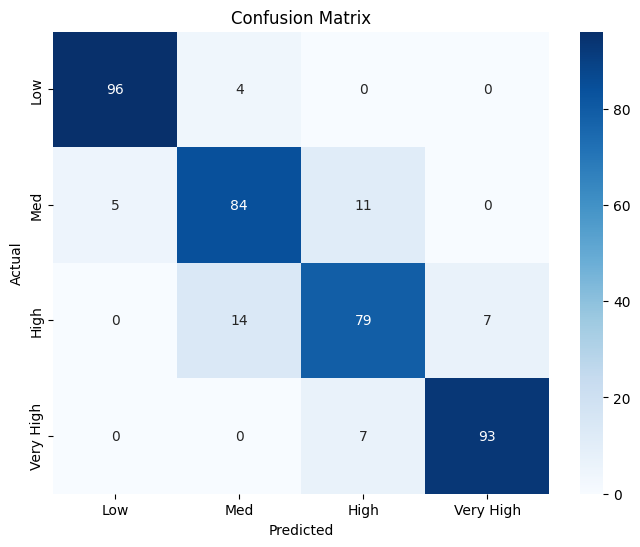

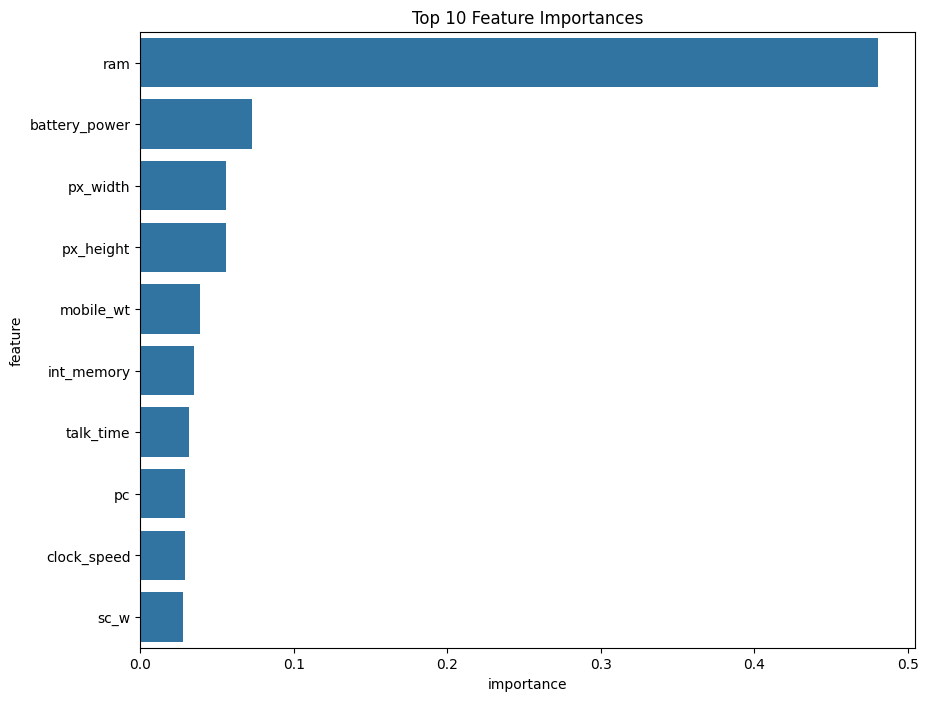

In [19]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, 
                                 class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Low', 'Med', 'High', 'Very High'],
           yticklabels=['Low', 'Med', 'High', 'Very High'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

#Complete Prediction Sysytem

In [21]:
class MobilePricePredictor:
    def __init__(self, model, scaler, numeric_features):
        self.model = model
        self.scaler = scaler
        self.numeric_features = numeric_features
        self.price_labels = {
            0: 'Low Cost',
            1: 'Medium Cost', 
            2: 'High Cost',
            3: 'Very High Cost'
        }
    
    def predict(self, features_dict):
        # Convert to DataFrame
        input_data = pd.DataFrame([features_dict])
        
        # Scale numeric features
        input_data_scaled = input_data.copy()
        input_data_scaled[self.numeric_features] = self.scaler.transform(
            input_data[self.numeric_features])
        
        # Predict
        prediction = self.model.predict(input_data_scaled)[0]
        probability = self.model.predict_proba(input_data_scaled)[0]
        
        return {
            'price_range': self.price_labels[prediction],
            'confidence': max(probability),
            'probabilities': {
                self.price_labels[i]: prob for i, prob in enumerate(probability)
            }
        }

# Initialize the predictor
predictor = MobilePricePredictor(rf_model, scaler, numeric_features)

# Example usage
sample_phone = {
    'battery_power': 1500,
    'blue': 1,
    'clock_speed': 2.0,
    'dual_sim': 1,
    'fc': 8,
    'four_g': 1,
    'int_memory': 32,
    'm_dep': 0.8,
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 12,
    'px_height': 1920,
    'px_width': 1080,
    'ram': 3000,
    'sc_h': 15,
    'sc_w': 8,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}

prediction = predictor.predict(sample_phone)
print("Prediction Result:")
print(f"Price Range: {prediction['price_range']}")
print(f"Confidence: {prediction['confidence']:.2%}")
print("Probabilities:")
for price_class, prob in prediction['probabilities'].items():
    print(f"  {price_class}: {prob:.2%}")

Prediction Result:
Price Range: Very High Cost
Confidence: 56.00%
Probabilities:
  Low Cost: 0.00%
  Medium Cost: 10.00%
  High Cost: 34.00%
  Very High Cost: 56.00%


#Model Optimization and Cross-Validation

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Try different models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'SVM': SVC(random_state=42, probability=True)
}

# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Hyperparameter tuning for the best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train final model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Final evaluation
final_pred = best_model.predict(X_test_scaled)
print("Final Model Accuracy:", accuracy_score(y_test, final_pred))

Random Forest - Cross-validation Accuracy: 0.866 ± 0.006
XGBoost - Cross-validation Accuracy: 0.890 ± 0.013
SVM - Cross-validation Accuracy: 0.878 ± 0.018
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8756250000000001
Final Model Accuracy: 0.895
